<a href="https://colab.research.google.com/github/pacayton/Stat_268_Advanced_Time_Series_Analysis/blob/main/Stat_268_Week_5_Multivariate_Time_Series_Analysis_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stat 268: Advanced Time Series Analysis
$$\quad$$
#### Assoc Prof Peter Julian Cayton, PhD
#### School of Statistics
#### University of the Philippines Diliman
#### [Google Scholar](https://scholar.google.com/citations?user=KtH_mGEAAAAJ)

In [ ]:
## Preamble: Please install the following packages before running the codes

install.packages("TSA") ## TSAAR's package for data and functions
install.packages("MTS") ## MTS package for data and functions
install.packages('SimDesign') ## Necessary for Multivariate Simulation
install.packages("dse", repos="http://R-Forge.R-project.org") ## Old dse1 package used in AICTSR
install.packages("EvalEst", repos="http://R-Forge.R-project.org") ## Additional Support package for dse
install.packages("vars") ## Vector Autogression Package used in AICTSR
install.packages("fpp2") ## FPP2's package for data and functions
install.packages("tidyverse") ## for better data management
install.packages("matrixcalc") ## For matrix operations

library(TSA)
library(MTS)
library(SimDesign)
library(dse)
library(EvalEst)
library(vars)
library(fpp2)
library(tidyverse)
library(matrixcalc)

# Multivariate Time Series Analysis
* A branch of multivariate statistical analysis that deals with time series data. (MTSA)
* The objectives of multivariate time series analysis includes (MTSA):

> 1. to study the dynamic relationships between variables
> 2. to improve accuracy of forecasting or prediction





## Some Basic Concepts in Multivariate Time Series

#### Random Vector

for time $t=1,2,...,T$,

$$
\mathbf{z}_t =
  \begin{bmatrix}
  z_{1t} \\
  z_{2t} \\
  \vdots \\
  z_{kt}
  \end{bmatrix}
$$

where $k$ is the number of random variables in the vector. We will also use this when referring to a vector of variables to analyze in the data.

#### Expected Value

The expected value, or *mean vector*, of a random vector $\mathbf{z}_t$ is denoted by:

$$\mathbf{\mu}_t = E[\mathbf{z}_t] =    
\begin{bmatrix}
  E(z_{1t}) \\
  E(z_{2t}) \\
  \vdots \\
  E(z_{kt})
  \end{bmatrix}
$$

If all variables are weakly-stationary, which is equivalent to saying the vector is weakly-stationary, then the individual means are constant, then we write $\mathbf{\mu}_t = \mathbf{\mu}$.

A property of the expected value: for $\mathbf{z}_t$ as a random vector with mean $\mathbf{\mu}_t$ with constant matrix $\mathbf{A}$ and constant vector $\mathbf{b}$,

$$ E[\mathbf{A}\mathbf{z}_t + \mathbf{b}] = \mathbf{A}\mathbf{\mu}_t + \mathbf{b} $$

#### Variance-Covariance & Correlation Matrices

The variance-covariance matrix, or *covariance matrix* for short, of a random vector $\mathbf{z}_t$ is

\begin{align*}
\mathbf{\Sigma}_t & = Cov[\mathbf{z}_t] = E [(\mathbf{z}_{t} - \mathbf{\mu}_{t})(\mathbf{z}_{t} - \mathbf{\mu}_{t})'] \\
& =    
\begin{bmatrix}
  E[(z_{1t} - \mu_{1t})^2] & E[(z_{1t} - \mu_{1t})(z_{2t} - \mu_{2t})] & \cdots & E[(z_{1t} - \mu_{1t})(z_{kt} - \mu_{kt})]  \\
  E[(z_{2t} - \mu_{2t})(z_{1t} - \mu_{1t})] & E[(z_{2t} - \mu_{2t})^2] & \cdots & E[(z_{2t} - \mu_{2t})(z_{kt} - \mu_{kt})]  \\
  \vdots & \vdots & \ddots & \vdots \\
  E[(z_{kt} - \mu_{kt})(z_{1t} - \mu_{1t})] & E[(z_{kt} - \mu_{kt})(z_{2t} - \mu_{2t})] & \cdots & E[(z_{kt} - \mu_{kt})^2]
  \end{bmatrix} \\
& = \begin{bmatrix}
  \sigma^2_{1,t} & \sigma_{12,t} & \cdots & \sigma_{1k,t}  \\
  \sigma_{21,t} &  \sigma^2_{2,t} & \cdots & \sigma_{2k,t}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \sigma_{k1,t} & \sigma_{k2,t} & \cdots & \sigma^2_{k,t}
  \end{bmatrix}
\end{align*}

Comments:

* For stationary vectors, it is also assumed that the covariance matrix is constant: $\mathbf{\Sigma}_t = \mathbf{\Sigma} $.

* A property of the covariance matrix: for $\mathbf{z}_t$ as a random vector with a covariance matrix $\mathbf{\Sigma}_t$ with constant matrix $\mathbf{A}$ and constant vector $\mathbf{b}$,

$$ Cov[\mathbf{A}\mathbf{z}_t + \mathbf{b}] = \mathbf{A}\mathbf{\Sigma}_t \mathbf{A}' $$

* Also, the covariance matrix is symmetric: $\mathbf{\Sigma}_t = \mathbf{\Sigma}'_t$

* Covariance matrices should be positive-definite.

For a random vector $\mathbf{z}_t$, let the $\mathbf{V}_t$ be a diagonal matrix with the diagonal elements of $\mathbf{\Sigma}_t$ which contains the variance of the individual variables of the vector. Then, the *correlation matrix* is defined as:

$$\mathbf{R}_t = Cov[\mathbf{V}_t^{-1/2}\mathbf{z}_t] = \mathbf{V}_t^{-1/2} \mathbf{\Sigma}_t \mathbf{V}_t^{-1/2}
= \begin{bmatrix}
  1 & \rho_{12,t} & \cdots & \rho_{1k,t}  \\
  \rho_{21,t} &  1 & \cdots & \rho_{2k,t}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \rho_{k1,t} & \rho_{k2,t} & \cdots & 1
  \end{bmatrix}
$$

Comments:

* The correlation matrix is also symmetric: $\mathbf{R}_t = \mathbf{R}'_t$

* Correlations are also positive-definite.

#### Cross-Covariance and Cross-Correlation Matrices

For a random vector $\mathbf{z}_t$, the cross covariance matrix is defined as:

\begin{align*}
\mathbf{\Gamma}_{t, l} & = Cov[\mathbf{z}_t, \mathbf{z}_{t-l}] = E [(\mathbf{z}_{t} - \mathbf{\mu}_{t})(\mathbf{z}_{t-l} - \mathbf{\mu}_{t-1})'] \\
& =    
\begin{bmatrix}
  E[(z_{1t} - \mu_{1t})(z_{1,t-l} - \mu_{1,t-1})] & E[(z_{1t} - \mu_{1t})(z_{2,t-l} - \mu_{2,t-1})] & \cdots & E[(z_{1t} - \mu_{1t})(z_{k,t-1} - \mu_{k,t-1})]  \\
  E[(z_{2t} - \mu_{2t})(z_{1,t-1} - \mu_{1,t-1})] & E[(z_{2t} - \mu_{2t})(z_{2,t-1} - \mu_{2,t-1})] & \cdots & E[(z_{2t} - \mu_{2t})(z_{k,t-1} - \mu_{k,t-1})]  \\
  \vdots & \vdots & \ddots & \vdots \\
  E[(z_{kt} - \mu_{kt})(z_{1,t-1} - \mu_{1,t-1})] & E[(z_{kt} - \mu_{kt})(z_{2,t-1} - \mu_{2,t-1})] & \cdots &  E[(z_{kt} - \mu_{kt})(z_{k,t-1} - \mu_{k,t-1})]
  \end{bmatrix} \\
& = \begin{bmatrix}
  \gamma_{1,t,l} & \gamma_{12,t,l} & \cdots & \gamma_{1k,t,l}  \\
  \gamma_{21,t,l} &  \gamma_{2,t,l} & \cdots & \gamma_{2k,t,l}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \gamma_{k1,t,l} &  \gamma_{k2,t,l} & \cdots & \gamma_{k,t,l}  \\
  \end{bmatrix}
\end{align*}

and the cross correlation matrix $\mathbf{\rho}_{t,l}$ is defined as

$$\mathbf{\rho}_{t,l} = \mathbf{V}_t^{-1/2} \mathbf{\Gamma}_{t,l} \mathbf{V}_t^{-1/2}
= \begin{bmatrix}
  \rho_{1,t,l} & \rho_{12,t,l} & \cdots & \rho_{1k,t,l}  \\
  \rho_{21,t, l} &  \rho_{2,t,l} & \cdots & \rho_{2k,t,l}  \\
  \vdots & \vdots & \ddots & \vdots \\
  \rho_{k1,t,l} & \rho_{k2,t,l} & \cdots & \rho_{k,t,l}
  \end{bmatrix}
$$

Comments:

* For stationary vector time series, the cross-covariance and cross-correlation matrices only depend on the lag $l$:

$$\mathbf{\Gamma}_{t,l} = \mathbf{\Gamma}_{l}$$
$$\mathbf{\rho}_{t,l} = \mathbf{\rho}_{l}$$

* A property of cross-covariance and cross-correlation matrix in stationary vectors:

$$\mathbf{\Gamma}_{l} = \mathbf{\Gamma}'_{-l}$$
$$\mathbf{\rho}_{l} = \mathbf{\rho}'_{-l}$$

### A Stationary Linear Time Series Model

#### Weakly Stationary Time Series

As we have described earlier, a weakly stationary has the following properties:

1.  a constant mean vector through time: $\mathbf{\mu}_t = \mathbf{\mu}$,

2. a constant covariance matrix: $\mathbf{\Sigma}_t = \mathbf{\Sigma} $, and

3. a cross-covariance matrix that only depends on the lag or time difference $l$: $\mathbf{\Gamma}_{t,l} = \mathbf{\Gamma}_{l}$

#### A White Noise Analogue in Vector Time Series

For our purposes, we define

$$\mathbf{a}_t = [\mathbf{a}_{1t}, ..., \mathbf{a}_{kt}]' \sim iid (\mathbf{\mu} = \mathbf{0}, \mathbf{\Sigma}_a)$$

with $\mathbf{\Sigma}_a$ as positive-definite. This specification may act as our vector process similar to the white noise in univariate time series.

There are also other specifications where would use a process with zero mean vector and diagonal covariance matrix. This is done by Cholesky decomposition of $\mathbf{\Sigma}_a$ with the following form:

$$\mathbf{\Sigma}_a = \mathbf{L}  \mathbf{G}_a \mathbf{L}' $$

where $\mathbf{G}_a$ is diagonal matrix and $\mathbf{L}$ is a lower triangular matrix with diagonal elements being $1$. what happens is that

$$\mathbf{b}_t = [\mathbf{b}_{1t}, ..., \mathbf{b}_{kt}]' \sim iid (\mathbf{\mu} = \mathbf{0}, \mathbf{G}_a)$$
$$ \mathbf{a}_t =  \mathbf{L} \mathbf{b}_t \sim iid (\mathbf{\mu} = \mathbf{0},  \mathbf{L}  \mathbf{G}_a \mathbf{L}' = \mathbf{\Sigma}_a)$$

The feature of $\mathbf{b}_t $ is that its elements are all uncorrelated among each other which may be easier to generate as compared to using a fully defined covariance matrix as $\mathbf{a}_t$ would require.

#### The Stationary Linear Model

A manner to generate a stationary vector time series $\mathbf{z}_t $ from $\mathbf{a}_t \sim iid (\mathbf{0}, \mathbf{\Sigma}_a)$ is using the model

$$\mathbf{z}_t = \mathbf{\mu} + \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{a}_{t-i}$$

where $ \mathbf{\mu} $ is a constant vector, $\mathbf{\psi}_0 = \mathbf{I}_k$, and $\mathbf{\psi}_i, i> 0$ are constant matrices that follow the stationarity condition that

$$\sum_{i =0}^{\infty} \|\mathbf{\psi}_i \| < \infty $$

where $\| ∘ \|$ is a norm of the matrix, e.g., the Frobenius norm  $\| \mathbf{A} \| = \sqrt{tr(\mathbf{A}\mathbf{A}')}$.

Comments:

* In simple terms, this is the vector equivalent of a restricted infinite MA model known in univariate time series analysis, which is also called the *Wold moving average representation*.

* Vector Moving Average (VMA) models are not frequently used in time series applications but do exist and are discussed extensively in MTSA. We will not be covering these models in the course.

* the vector $\mathbf{a}_t$ is called the *innovation* series of $\mathbf{z}_t$ as it presents unique information only available at time $t$.

* The mean vector and covariance matrix of $\mathbf{z}_t$ is:

$$E[\mathbf{z}_t] = \mathbf{\mu} \quad , \quad Cov[\mathbf{z}_t]  = \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{\Sigma}_a \mathbf{\psi}'_i$$

* Alternatively, the model can be respecified with $\mathbf{b}_t $ that uses the Cholesky decomposition of $\mathbf{\Sigma}_a = \mathbf{L}  \mathbf{G}_a \mathbf{L}' $ via $\mathbf{a}_t =  \mathbf{L} \mathbf{b}_t$:

$$\mathbf{z}_t = \mathbf{\mu} + \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{a}_{t-i} = \mathbf{\mu} + \sum_{i =0}^{\infty} [ \mathbf{\psi}_i \mathbf{L} ] \mathbf{b}_t = \mathbf{\mu} + \sum_{i =0}^{\infty}  \mathbf{\psi}^*_i  \mathbf{b}_t$$
$$\mathbf{\psi}^*_0 = \mathbf{L} \quad , \quad \mathbf{\psi}^*_i = \mathbf{\psi}_i \mathbf{L}  \quad \mathbb{ for } \quad i >0$$

* $ \mathbf{\psi}_i = \{\psi_{i,r,c}\}$ is known as the *impulse response function* at lag $i$. Its elements $\psi_{i,r,c}$ describe that if there is a impulse or sudden rise by $+1$ unit from the innovation related to the $c^{th}$ variable in the vector time series, the $r^{th}$ variable responds with a change $\psi_{i,r,c}$ delayed by lag $i$. The function is an important inference tool in understanding multivariate time series.

* $ \mathbf{\psi}^*_i = \{\psi^*_{i,r,c}\}$ is also an impulse response function, but its structure is influenced by the Cholesky decomposition. The ordering of the variables in terms of decomposition is very important in using it in inference. Often, the impulse is assumed to be of size $+1$ s.d. adjusted by Cholesky decomposition.

* The cross covariance and cross correlation matrices of the stationary linear model is as follows, where ${diag}^*\{ \mathbf{A} \}$ is a function that creates a diagonal matrix from the diagonal elements of $\mathbf{A} $:

$$\mathbf{\Gamma}_l =  \sum_{i =l}^{\infty} \mathbf{\psi}_i \mathbf{\Sigma}_a \mathbf{\psi}'_{i-l}$$

$$\mathbf{V}_z = {diag}^*\{Cov[ \mathbf{z}_t ] \} $$
$$\mathbf{\rho}_l = \mathbf{V}^{-1/2}_z \mathbf{\Gamma}_l \mathbf{V}^{-1/2}_z $$

* We often make plots of the values of $\mathbf{\rho}_l$ with a range of lags to infer on the structure of the multivariate time series to be created, similar to how we use ACFs in unvariate time series analysis.

### Estimators for Parameter Quantities

Given the sample data $\{\mathbf{z}_t = [z_{1t}, ...,z_{kt} ] ' \}^T_{t=1}$,

$$\hat{\mathbf{\mu}} = \bar{\mathbf{z}}_t = \frac{1}{T} \sum_{t=1}^T \mathbf{z}_t $$

$$\hat{\mathbf{\Gamma}}_0 = \hat{\mathbf{\Sigma}}_z = \frac{1}{T-1} \sum_{t=1}^T (\mathbf{z}_t - \hat{\mathbf{\mu}}) (\mathbf{z}_t - \hat{\mathbf{\mu}})'  $$

$$\hat{\mathbf{\Gamma}}_l  = \frac{1}{T-1} \sum_{t=l+1}^T (\mathbf{z}_t - \hat{\mathbf{\mu}}) (\mathbf{z}_{t-l} - \hat{\mathbf{\mu}})'  $$

$$ \hat{\mathbf{\rho}}_l = [{diag}^* \{ \hat{\mathbf{\Gamma}}_0 \}]^{-1/2} \hat{\mathbf{\Gamma}}_l [{diag}^* \{ \hat{\mathbf{\Gamma}}_0 \}]^{-1/2}$$

Comments:

* If $\mathbf{z}_t $ is a random sample from the multivariate normal distribution, then all the estimators above are consistent estimators of their respective parameter counterparts.

* They may still be consistent if the fourth-order cumulants are zero, i.e., if the excess kurtosis measures of the sample data is zero, similar to the multivariate normal distribution.

Let's show a demonstration of the sample cross-correlation matrix (CCM) in the MTS package for a white noise process, i.e., $\mathbf{\mu} = \mathbf{0}$, $\mathbf{\Sigma}_z = \mathbf{I}_2 $ and $\mathbf{\rho}_l = 0$ for $l>0$

[1] "Covariance matrix:"
        [,1]    [,2]
[1,] 1.14859 0.00563
[2,] 0.00563 1.02820
CCM at lag:  0 
        [,1]    [,2]
[1,] 1.00000 0.00518
[2,] 0.00518 1.00000
Simplified matrix: 
CCM at lag:  1 
. . 
. . 
CCM at lag:  2 
. . 
. . 
CCM at lag:  3 
. . 
. . 
CCM at lag:  4 
. . 
. . 
CCM at lag:  5 
. . 
. . 
CCM at lag:  6 
. . 
. . 
CCM at lag:  7 
. . 
. . 
CCM at lag:  8 
. . 
. . 
CCM at lag:  9 
. . 
. . 
CCM at lag:  10 
. . 
. . 
CCM at lag:  11 
. . 
. . 
CCM at lag:  12 
. . 
. . 



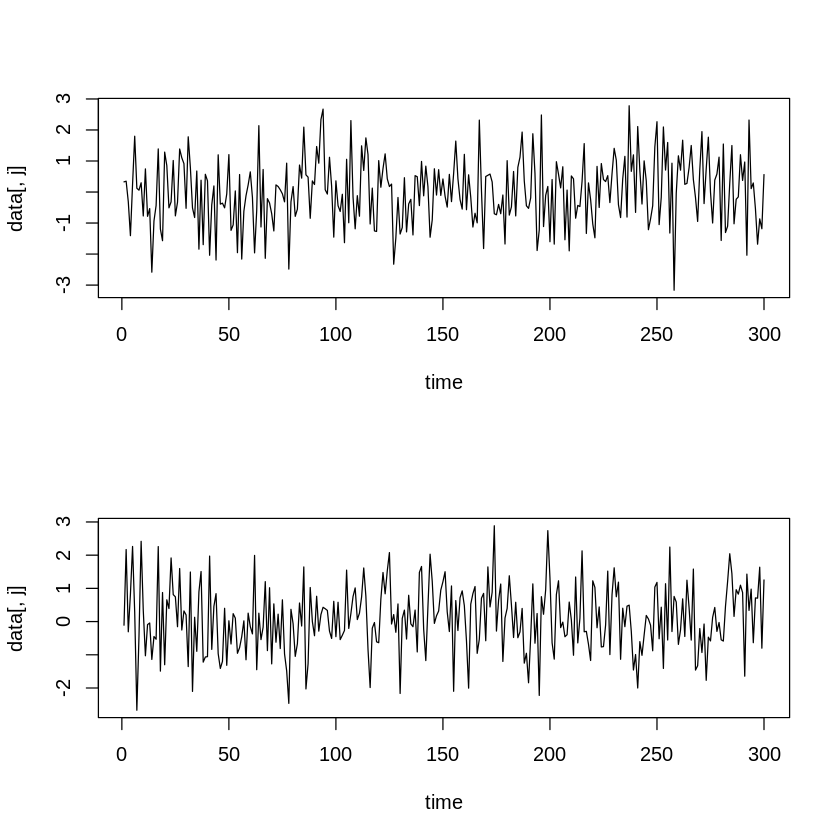

Hit Enter for p-value plot of individual ccm:  


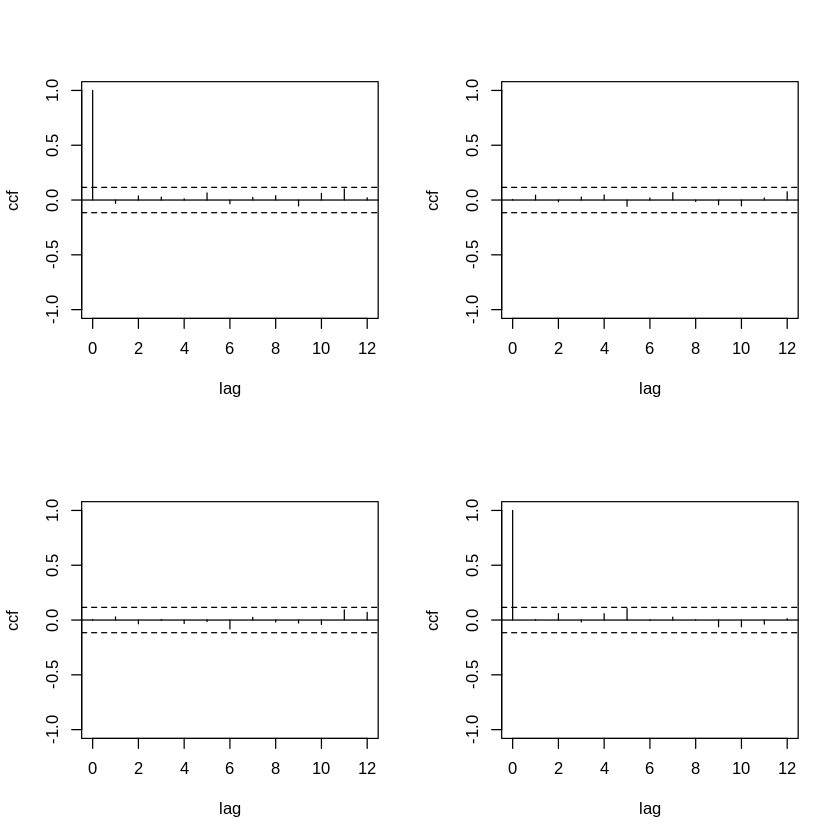

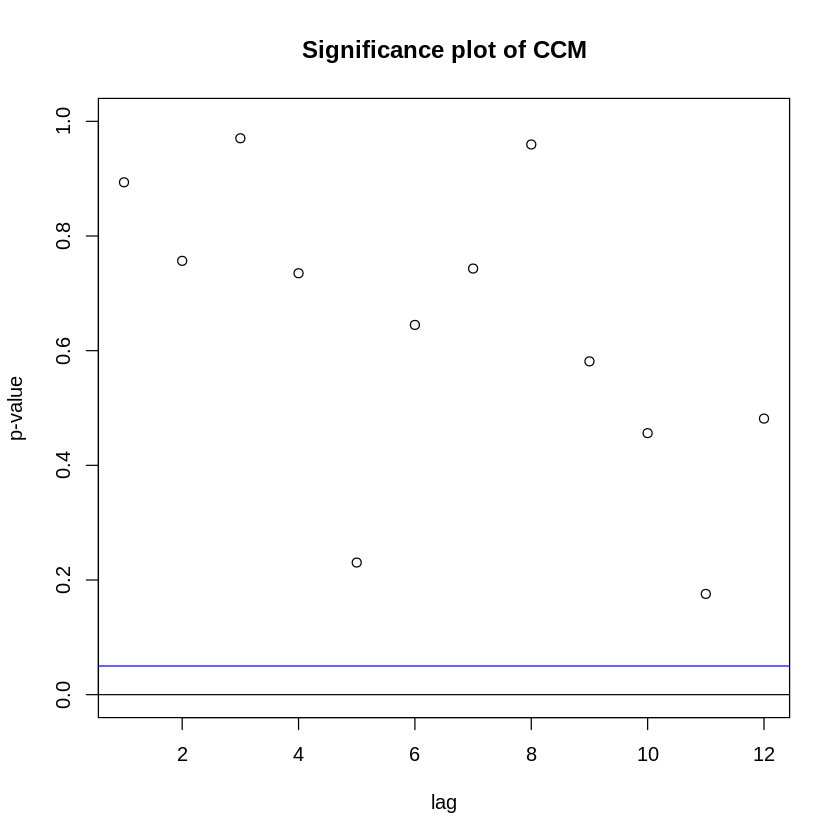

In [18]:
##  Simulating a White Noise Process

sig=diag(2) # create the 2-by-2 identity matrix
x <- rmvnorm(300,rep(0,2),sig) # generate random draws

# Data Visualization
MTSplot(x) # Obtain time series plots

# CCM Estimation Outputs
ccm(x)

## Note: pres Enter key to generate the other outputs

### Testing For Zero Cross Correlations

To test $H_0: \mathbf{\rho}_i = \mathbf{0}_{k \times k}, i =1,2,..., m$, i.e., zero cross correlations from lags $1$ to $m$, versus the alternative  $H_1: ∃i, \mathbf{\rho}_i \ne \mathbf{0}_{k \times k}, i =1,2,..., m$ is the multivariate Ljung-Box test statistics:

$$Q_k (m) = T^2 \sum_{l=1}^m \frac{1}{T-l} tr \left( \hat{\mathbf{\Gamma}}'_l \hat{\mathbf{\Gamma}}_0^{-1} \hat{\mathbf{\Gamma}}_l \hat{\mathbf{\Gamma}}_0^{-1} \right)$$

Under the null hypothesis, $Q_k (m) \sim \chi^2_{(df = mk^2)}$

One can use the p-value

$$pval[Q_k (m)] = P \left[ X > Q_k (m) | X \sim \chi^2_{(df = mk^2)} \right] $$

to make a decision for each lag span $m$ an in the MTS package, a significance plot with horizontal reference line at $0.05$ is used for the multivariate Ljung-Box test.

Let's try an R demonstration using data from MTSA, available for students in UVLe, and a simulation.


,year,mon,gdp,rate
,<int>,<int>,<dbl>,<dbl>
1,1948,1,1821.809,3.733333
2,1948,4,1855.345,3.666667
3,1948,7,1865.320,3.766667
4,1948,10,1868.184,3.833333
5,1949,1,1842.240,4.666667
6,1949,4,1835.512,5.866667


33.536,-0.066666
9.975,0.100000
2.864,0.066666
-25.944,0.833334
-6.728,1.200000
20.591,0.833333


Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]     1       140       4        0
 [2,]     2       196       8        0
 [3,]     3       213      12        0
 [4,]     4       232      16        0
 [5,]     5       241      20        0
 [6,]     6       246      24        0
 [7,]     7       250      28        0
 [8,]     8       261      32        0
 [9,]     9       281      36        0
[10,]    10       290      40        0


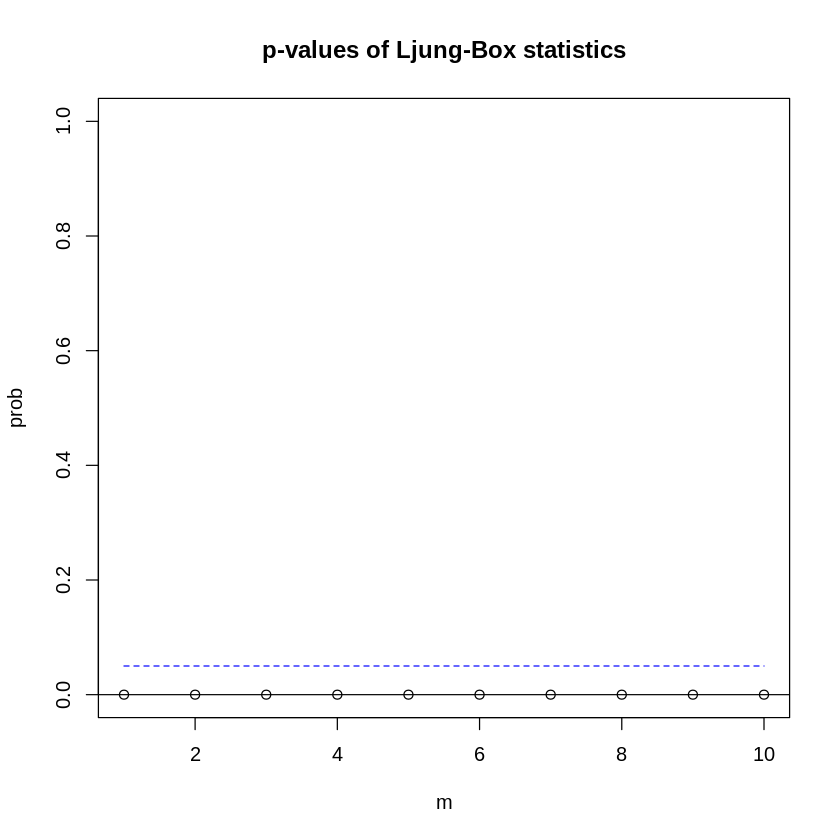

In [22]:
### Demonstration for Multivariate Ljung-Box test using Real Data

da <- read.table("/content/q-gdpunemp.txt",header=T) ## Note: data available in UVLe

head(da) ## peak on the first few lines of data

x <- cbind(diff(da$gdp),diff(da$rate)) ## compute for the differenced series

head(x)

mq(x, lag = 10) ## Compute for the multivariate Ljung-Box test from lags 1 to 10

Ljung-Box Statistics:  
        m       Q(m)     df    p-value
 [1,]   1.0      11.9     9.0     0.22
 [2,]   2.0      18.8    18.0     0.40
 [3,]   3.0      25.5    27.0     0.55
 [4,]   4.0      34.0    36.0     0.56
 [5,]   5.0      39.3    45.0     0.71
 [6,]   6.0      52.0    54.0     0.55
 [7,]   7.0      60.2    63.0     0.58
 [8,]   8.0      65.7    72.0     0.69
 [9,]   9.0      76.6    81.0     0.62
[10,]  10.0      94.0    90.0     0.36


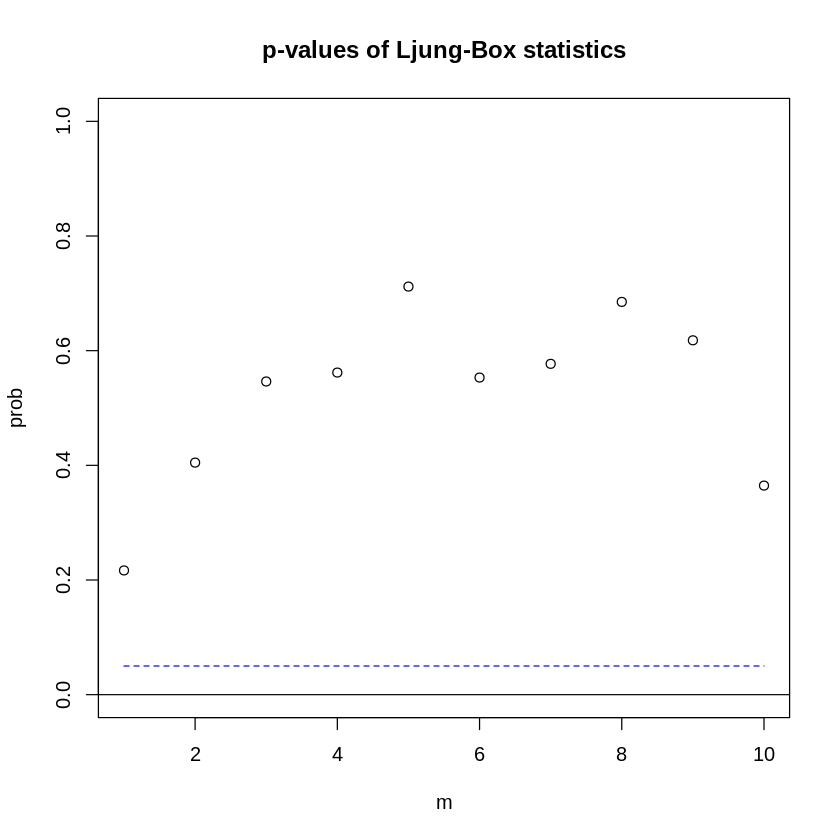

In [23]:
### Demonstration for Multivariate Ljung-Box test using Simulated Data.

sig <- diag(3) ## Cov matrix = I_3x3
z=rmvnorm(200,rep(0,3),sig)
mq(z,10)

## Vector Autoregression Model

A multivariate time series $\mathbf{z}_t = [{z}_{1t},..., {z}_{kt}]'$ follows a vector autogression model of order $p$, denoted as $VAR(p)$, if (MTSA)

$$\mathbf{z}_t = \mathbf{c} + \sum_{i=1}^p \mathbf{\phi}_i \mathbf{z}_{t-i} + \mathbf{a}_t $$

where $\mathbf{c}$ is a constant vector, $\mathbf{\phi}_i \ne \mathbf{0}_{k \times k}$, and $\mathbf{a}_t \sim iid (\mathbf{0}_k, \mathbf{\Sigma}_a)$, with $\mathbf{\Sigma}_a$ being positive definite.



Comments:

* Alternatively, one can restate the model in terms of lag matrix polynomials, where $\mathbf{\phi}_p (B) = \mathbf{I}_k - \sum_{i=1}^p \mathbf{\phi}_i B^{i} $ and $\mathbf{\mu}_z = [\mathbf{I}_k - \sum_{i=1}^p \mathbf{\phi}_i]^{-1}\mathbf{c}  $:

$$\mathbf{\phi}_p (B) [\mathbf{z}_t - \mathbf{\mu}_z] = \mathbf{a}_t  $$

* For a $VAR(p)$ process to be stationary, the following condition for the matrix polynomial should be met, with $b$ being a scalar variable:

$$det \left[ \mathbf{I}_k - \sum_{i=1}^p \mathbf{\phi}_i b^{i} \right] \ne 0 \quad , \quad |b| \le 1 $$

* If the determinant polynomial above has a root at $b=1$, it means that at least one of the components of the vector $\mathbf{z}_t$ may have an integration order of 1, $I(1)$, which may imply a requirement for differencing or alternative models.

* In AICTSR, the specification used includes a provision for exogenous variables:

$$\mathbf{z}_t = \mathbf{BX}_t  + \sum_{i=1}^p \mathbf{\phi}_i \mathbf{z}_{t-i} + \mathbf{a}_t $$

* In the specification above, $\mathbf{B}$ is a $k \times r$ matrix of coefficients and $\mathbf{X}_t$ is an $r \times 1$ vector of exogenous variables for each time point $t$. A special case is $\mathbf{X}_t = 1$ which is a scalar and thus $\mathbf{B} = \mathbf{c}$.

* When we mean "exogenous variable", it means the variable affects some or all the variables in the vector but the vector variables do not affect the exogenous variable. It is "outside the system", thus, exogenous.

* Examples of exogenous variables are trend indices and seasonal indicators but some fields have other contexts on how exogeneity is determined.

* "Endogenous" means "within the system" in lay terms, so all the variables in the vector of interest are endogenous variables.



* One can extract the Wold moving average representation of a $VAR(p)$ process to extract the impulse response function $\mathbf{\psi}_i$, assuming $\mathbf{z}_t$ has zero mean vector:

$$\mathbf{\phi}_p (B) \mathbf{z}_t  = \mathbf{a}_t \Rightarrow  \mathbf{z}_t  = \mathbf{\phi}_p (B)^{-1} \mathbf{a}_t = \mathbf{\psi} (B) \mathbf{a}_t = \sum_{i =0}^{\infty} \mathbf{\psi}_i \mathbf{a}_{t-i} $$

* The algorithm for the solution to turn the $VAR(p)$ to a restricted $VMA(\infty)$ is:

$$ \mathbf{\psi}_0 = \mathbf{I}_k \quad , \quad \mathbf{\psi}_i =   \sum_{j =1}^{i} \mathbf{\psi}_{i-j} \mathbf{\phi}_j \quad , \quad i > 0 \quad ; \quad {\phi}_j = \mathbf{0}_{k \times k} \quad , \quad j > p $$

### Estimation of the VAR(p) Model

In the estimation of the $VAR(p)$ model, the following approaches are typically used:

1. Least Squares (LS) approach, of which the Ordinary Least Squares is used
2. Maximum Likelihood Estimation (MLE), which assumes the innovation series $\mathbf{a}_t \sim iid \: N_p (\mathbf{0}_k, \mathbf{\Sigma}_a)$
3. Bayesian approach (BVAR), which uses conjugate priors for the multivariate normal distribution.

To use these methods, one would transform the $VAR(p)$ model into a multivariate regression model:

$$\mathbf{Z} = \mathbf{X \beta} + \mathbf{A} $$

where:

$$
\mathbf{Z} =
\begin{bmatrix}
\mathbf{z}'_{p+1} \\
\mathbf{z}'_{p+2} \\
\vdots \\
\mathbf{z}'_{T}
\end{bmatrix} ,  \;(T-p)\times k \; matrix ;
$$

$$
\mathbf{X} =
\begin{bmatrix}
1 & \mathbf{z}'_{p} & \mathbf{z}'_{p-1} & ... & \mathbf{z}'_{1} \\
1 & \mathbf{z}'_{p+1} & \mathbf{z}'_{p} & ... & \mathbf{z}'_{2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \mathbf{z}'_{T-1} & \mathbf{z}'_{T-2} & ... & \mathbf{z}'_{T-p}
\end{bmatrix},   \;(T-p)\times (kp + 1) \; matrix ;
$$

$$
\mathbf{\beta} =
\begin{bmatrix}
\mathbf{c}' \\
\mathbf{\phi}'_{1} \\
\vdots \\
\mathbf{\phi}'_{p}
\end{bmatrix} , \; (kp + 1) \times k  \; matrix ;
$$

$$
\mathbf{A} =
\begin{bmatrix}
\mathbf{a}'_{p+1} \\
\mathbf{a}'_{p+2} \\
\vdots \\
\mathbf{a}'_{T}
\end{bmatrix} ,  \;(T-p)\times k \; matrix  
$$

From the results in MTSA, the estimators based on LS and MLE for $\mathbf{\beta}$ are similar, with

$$ \hat{\mathbf{\beta}} = (\mathbf{X}'\mathbf{X})^{-1} \mathbf{X}'\mathbf{Z}$$

The estimator for $\mathbf{\Sigma}_a$ is slightly different for the two approaches, with $\hat{\mathbf{A}} = \mathbf{Z} - \mathbf{X \hat{\beta}}$ as the residual matrix:

$$\hat{\mathbf{A}}'\hat{\mathbf{A}} = [T - p - (kp + 1)]  \hat{\mathbf{\Sigma}}^{(OLS)}_a = (T-p)  \hat{\mathbf{\Sigma}}^{(MLE)}_a$$

**Theorem**: Properties of the LS and ML estimators for stationary $VAR(p)$ models

1. $E[\hat{\mathbf{\beta}}] = \mathbf{\beta} $

2. $E[\hat{\mathbf{\Sigma}}^{(OLS)}_a] = \mathbf{\Sigma}_a $

3. $E[\hat{\mathbf{\Sigma}}^{(MLE)}_a] \rightarrow \mathbf{\Sigma}_a $ as $T \rightarrow \infty$ for a fixed $p$ and $k$

4. $Cov[vec(\hat{\mathbf{\beta}})] = \hat{\mathbf{\Sigma}}^{(aproach)}_a ⊗ (\mathbf{X}'\mathbf{X})^{-1}$ where the $\hat{\mathbf{\Sigma}}^{(aproach)}_a$ depends whether one used LS or MLE.

Let us show some demonstration from MTSA on using the matrix operations to derive the estimators based on LS and MLE.

We will use the *q-gdp-ukcaus.txt* dataset available in UVLe for this. It is GDP data of UK, Canada, and US from 1980 Q1 to 2011 Q2.



,year,mon,uk,ca,us
,<int>,<int>,<int>,<int>,<int>
1,1980,1,172436,624794,5908500
2,1980,4,169359,623433,5787400
3,1980,7,169038,623215,5776600
4,1980,10,167180,630215,5883500
5,1981,1,166052,645957,6005700
6,1981,4,166393,651954,5957800


[1] 126   3

[1] 125   3

,uk,ca,us
"rep(1, 123)",0.12581630,0.123158083,0.28955814
uk,0.39306691,0.351313628,0.49069776
ca,0.10310572,0.338141505,0.24000097
us,0.05213660,0.469093555,0.23564221
uk,0.05660120,-0.191350134,-0.31195550
ca,0.10552241,-0.174833458,-0.13117863
us,0.01889462,-0.008677767,0.08531363


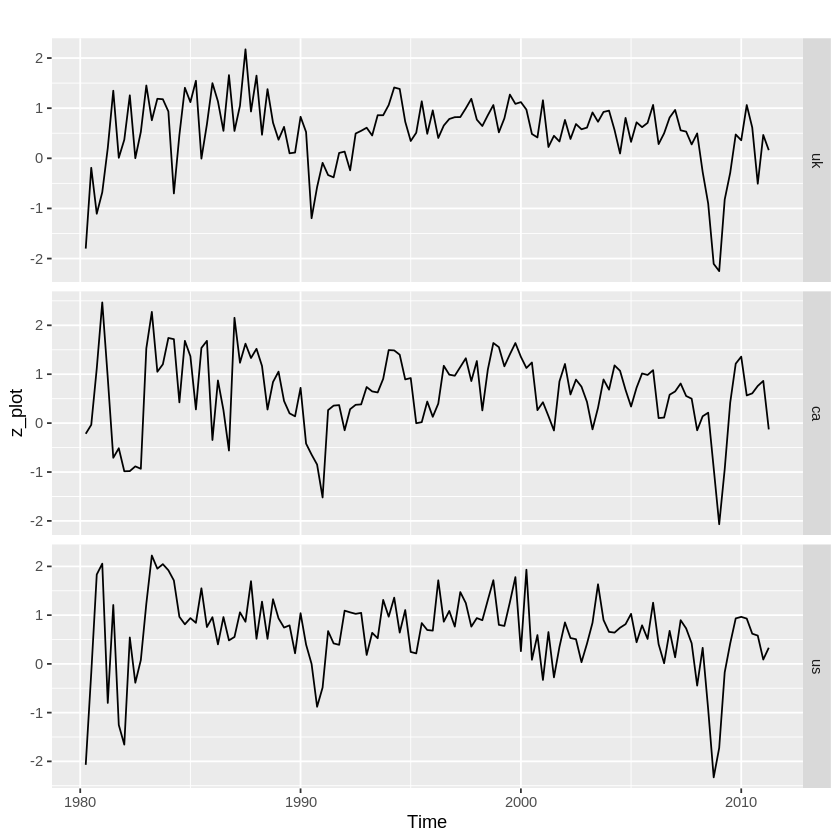

In [24]:
## Example Estimation of VAR(1) using LS and MLE using Matrix Operations

## before reading the data,
## upload data within your local machine or into Google Colab
da <- read.table("/content/q-gdp-ukcaus.txt",header=T)

head(da) ## peek into the first few rows
## Quarterly data of GDP for UK, CA(nada) and US.

gdp <- log(da[,3:5]) ## Log Transform of the Data,
## a common variance stabilizing transformation

dim(gdp) ## number of periods and variables as rows and columns, respectively

z <- (gdp[2:126,]-gdp[1:125,]) * 100
## Difference of Logarithms approx. = quarter-on-quarter growth rate,
## 100 converts into percent.

dim(z) ## differencing naturally reduces available sample size

z_plot <- ts(z, frequency =4, start = c(1980,2))
## Declaring the data as quarterly for plotting purposes

autoplot(z_plot, facets = TRUE) ## Plotting the data separately

Z <- as.matrix(z[3:125,]) ## our Z matrix for multivar regression
## We only used from 3 to 125 because we will do VAR(2)

X <- as.matrix( cbind(rep(1,123),z[2:124,],z[1:123,]) )
## X matrix, with first column being a column of 1,
## and the other columns are lagged values of the growth rates

XPX <- t(X)%*%X
## X'X , where t() is the transpose function

XPXinv <- solve(XPX)
## (X'X)^(-1), the solve() function provides the inverse of a matrix

XPZ <- t(X)%*%Z
## X'Z

(bhat <- XPXinv%*%XPZ)
## beta_hat = (X'X)^(-1) X'Z
## Reading the results:
## Column Names = the endogenous variable of the linear regression
## associated with the column of estimates
## First row of numbers = intercept vector
## 2nd - 4th row = VAR(1) coefficients
## 5td - 7th row = VAR(2) coefficients



In [25]:
## LS & ML Estimate for the Cov_A, residual covariance matrix

A <- Z - X %*% bhat ## Residual Matrix

(Sig <- t(A) %*% A / (125-(3+1)*2-1))
## LS Estimate of Residual Covariance, Unbiased Estimator

(Sig1 <- t(A) %*% A / (125-2))
## ML Estimate of Residual Covariance, Biased Estimator

,uk,ca,us
uk,0.29948825,0.02814252,0.07883967
ca,0.02814252,0.30917711,0.14790523
us,0.07883967,0.14790523,0.37850674


,uk,ca,us
uk,0.28244420,0.02654091,0.07435286
ca,0.02654091,0.29158166,0.13948786
us,0.07435286,0.13948786,0.35696571


In [44]:
## Using the LS Approach, Solve for SE and Test Stats of Betas

beta <- matrixcalc::vec(bhat) ## Vectorize the bhat matrix into a column vector

COV_beta <- kronecker(Sig,XPXinv) ## Covariance matrix of beta


se <- sqrt(diag(COV_beta)) ## Extracting the Standard Error of beta

name_mat <- matrix(NA, nrow = 7, ncol = 3) ## container for coef names

for (i in 1:7) {
  for (j in 1:3) {
    name_mat[i,j] <- paste0(rownames(bhat)[i],"_", colnames(bhat)[j])
    ## Assigning coef names
  }
}

coef_name <- rbind(as.matrix(name_mat[,1]), as.matrix(name_mat[,2]),
                  as.matrix(name_mat[,3]) )
                  ## vectorizing coef names

( para <- data.frame( coef_name = coef_name,
                      beta = beta,
                      se = se,
                      t_ratio = beta/se,
                      Sig_YN = abs(beta/se) > 2)
                      )

coef_name,beta,se,t_ratio,Sig_YN
<chr>,<dbl>,<dbl>,<dbl>,<lgl>
"rep(1, 123)_uk",0.125816304,0.07266338,1.7314953,FALSE
uk_uk,0.393066914,0.09341839,4.2075968,TRUE
ca_uk,0.103105720,0.09838425,1.0479901,FALSE
us_uk,0.052136600,0.09112636,0.5721353,FALSE
uk_uk,0.056601196,0.09237356,0.6127424,FALSE
ca_uk,0.105522415,0.08755896,1.2051584,FALSE
us_uk,0.018894618,0.09382091,0.2013903,FALSE
"rep(1, 123)_ca",0.123158083,0.07382941,1.6681440,FALSE
uk_ca,0.351313628,0.09491747,3.7012536,TRUE


On the next set of code, we estimate a VAR model using available simplified syntax.

In [52]:

m1 <- VAR(z,2) ## Estimating a VAR(2) Model with the same data

summary(m1) ## Summary of results




VAR Estimation Results:
Endogenous variables: uk, ca, us 
Deterministic variables: const 
Sample size: 123 
Log Likelihood: -290.487 
Roots of the characteristic polynomial:
0.6136 0.6136 0.356 0.3321 0.3321 0.03676
Call:
VAR(y = z, p = 2)


Estimation results for equation uk: 
uk = uk.l1 + ca.l1 + us.l1 + uk.l2 + ca.l2 + us.l2 + const 

      Estimate Std. Error t value Pr(>|t|)    
uk.l1  0.39307    0.09342   4.208 5.11e-05 ***
ca.l1  0.10311    0.09838   1.048    0.297    
us.l1  0.05214    0.09113   0.572    0.568    
uk.l2  0.05660    0.09237   0.613    0.541    
ca.l2  0.10552    0.08756   1.205    0.231    
us.l2  0.01889    0.09382   0.201    0.841    
const  0.12582    0.07266   1.731    0.086 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.5473 on 116 degrees of freedom
Multiple R-Squared: 0.3829,	Adjusted R-squared: 0.3509 
F-statistic: 11.99 on 6 and 116 DF,  p-value: 1.907e-10 


Estimation results for equation ca: 
ca =

#### Bayesian VAR Approach

The full Bayesian result is available in MTSA and we will not discuss its derivation, but we can look at a specific cases of interest.

##### Case 1: Approximate MLE Approach

Below we have a specific case in which **all of the following apply**:

* $\mathbf{\beta}_o = \hat{\mathbf{\beta}}$, which can be chosen under the idea of empirical Bayesian analysis,
* $\mathbf{C} = \lambda \mathbf{I}_{(kp+1)}$, where $\lambda$ is a constant scalar
* $\mathbf{V}_o = \delta \mathbf{I}_{(kp+1)}$, where $\delta$ is a constant scalar, and
* $n_o = k +1 $,

then:

1. $\hat{\mathbf{\beta}}^{(BVAR)} = \hat{\mathbf{\beta}} $

2. $\hat{\mathbf{\Sigma}}^{(BVAR)}_a = \frac{1}{T - p } [\delta \mathbf{I}_{(kp+1)} + \hat{\mathbf{A}}'\hat{\mathbf{A}}]$

3. $Cov \left[ vec\left(\hat{\mathbf{\beta}}^{(BVAR)} \right) \right] = \hat{\mathbf{\Sigma}}^{(BVAR)}_a ⊗ (\mathbf{X}'\mathbf{X} + \lambda \mathbf{I}_{(kp+1)} )^{-1}$

Comments:

* All three methods, i.e., LS, ML, and empirical BVAR, lead to the same estimator for the regression parameters of $VAR(p)$
* If we let $\delta \rightarrow 0$ and $\lambda \rightarrow 0$, then $\hat{\mathbf{\Sigma}}^{(BVAR)}_a \rightarrow \hat{\mathbf{\Sigma}}^{(MLE)}_a$ and $Cov \left[ vec\left(\hat{\mathbf{\beta}}^{(BVAR)} \right) \right] \rightarrow Cov \left[ vec\left(\hat{\mathbf{\beta}}^{(MLE)} \right) \right] $

##### Case 2: Ridge Regression

Below we have a specific case in which **all of the following apply**:

* $\mathbf{\beta}_o = \mathbf{0}_{(kp + 1) \times k}$,
* $\mathbf{C} = \lambda \mathbf{I}_{(kp+1)}$, where $\lambda$ is a constant scalar
* $\mathbf{V}_o = \delta \mathbf{I}_{(kp+1)}$, where $\delta$ is a constant scalar, and
* $n_o = k +1 $,

then:

1. $\hat{\mathbf{\beta}}^{(BVAR)} = \hat{\mathbf{\beta}}^{(ridge)} = (\mathbf{X}'\mathbf{X} + \lambda \mathbf{I}_{(kp+1)})^{-1} \mathbf{X}'\mathbf{Z} $, which is the ridge regression estimator

2. $\hat{\mathbf{\Sigma}}^{(ridge)}_a = \frac{1}{T - p } \left[\delta \mathbf{I}_{(kp+1)} + \left(\mathbf{Z} - \mathbf{X}\hat{\mathbf{\beta}}^{(ridge)} \right) ' \left(\mathbf{Z} - \mathbf{X}\hat{\mathbf{\beta}}^{(ridge)} \right) + \lambda  \hat{\mathbf{\beta}}^{(ridge)'}  \hat{\mathbf{\beta}}^{(ridge)} \right] $

3. $Cov \left[ vec\left(\hat{\mathbf{\beta}}^{(ridge)} \right) \right] = \hat{\mathbf{\Sigma}}^{(ridge)}_a ⊗ (\mathbf{X}'\mathbf{X} + \lambda \mathbf{I}_{(kp+1)} )^{-1}$

Comments:

* As $\lambda \rightarrow 0$, then $\hat{\mathbf{\beta}}^{(ridge)} \rightarrow \hat{\mathbf{\beta}}$
* If we let $\delta \rightarrow 0$ and $\lambda \rightarrow 0$, then $\hat{\mathbf{\Sigma}}^{(ridge)}_a \rightarrow \hat{\mathbf{\Sigma}}^{(MLE)}_a$ and $Cov \left[ vec\left(\hat{\mathbf{\beta}}^{(ridge)} \right) \right] \rightarrow Cov \left[ vec\left(\hat{\mathbf{\beta}}^{(MLE)} \right) \right] $

Let's show an example code with the UKCAUS Data.

In [61]:
## Bayesian Estimation Using the Same UKCAUS Dataset

## Approximate MLE Case
C <- 0.1 *diag(7) ## lambda = 0.1 for lambda*I_7
V0 <- diag(3) ## = I_3
Phi0 <- bhat ## Assuming that MLE is the prior mean, empirical Bayesian approach

m_ridge <- BVAR(z,p=2,C,V0, Phi0 = bhat)
para # LS Estimate for reference

Bayesian estimate: 
               Est       s.e.     t-ratio
 [1,]  0.125816304 0.07121086  1.76681335
 [2,]  0.393066914 0.09148230  4.29664430
 [3,]  0.103105720 0.09631155  1.07054370
 [4,]  0.052136600 0.08923016  0.58429349
 [5,]  0.056601196 0.09046216  0.62568917
 [6,]  0.105522415 0.08575627  1.23049210
 [7,]  0.018894618 0.09186215  0.20568447
 [8,]  0.123158083 0.07232185  1.70291659
 [9,]  0.351313628 0.09290956  3.78124325
[10,]  0.338141505 0.09781414  3.45697971
[11,]  0.469093555 0.09062227  5.17636047
[12,] -0.191350134 0.09187350 -2.08275654
[13,] -0.174833458 0.08709419 -2.00740666
[14,] -0.008677767 0.09329533 -0.09301395
[15,]  0.289558145 0.07982172  3.62756089
[16,]  0.490697759 0.10254439  4.78522280
[17,]  0.240000969 0.10795759  2.22310417
[18,]  0.235642214 0.10001992  2.35595293
[19,] -0.311955500 0.10140090 -3.07645703
[20,] -0.131178630 0.09612597 -1.36465344
[21,]  0.085313633 0.10297017  0.82852765
Covariance matrix:  
           uk         ca         us

coef_name,beta,se,t_ratio,Sig_YN
<chr>,<dbl>,<dbl>,<dbl>,<lgl>
"rep(1, 123)_uk",0.125816304,0.07266338,1.7314953,FALSE
uk_uk,0.393066914,0.09341839,4.2075968,TRUE
ca_uk,0.103105720,0.09838425,1.0479901,FALSE
us_uk,0.052136600,0.09112636,0.5721353,FALSE
uk_uk,0.056601196,0.09237356,0.6127424,FALSE
ca_uk,0.105522415,0.08755896,1.2051584,FALSE
us_uk,0.018894618,0.09382091,0.2013903,FALSE
"rep(1, 123)_ca",0.123158083,0.07382941,1.6681440,FALSE
uk_ca,0.351313628,0.09491747,3.7012536,TRUE


In the approximate Bayesian case, there is a slight difference in the s.e. and the test stat values, but the estimates are exactly equal.

In [58]:
## Bayesian Estimation Using the Same UKCAUS Dataset

## Ridge Regression Case
C <- 0.1 *diag(7) ## lambda = 0.1 for lambda*I_7
V0 <- diag(3) ## = I_3
## Phi0 for the betas is the zero

m_ridge <- BVAR(z,p=2,C,V0)


Bayesian estimate: 
               Est       s.e.     t-ratio
 [1,]  0.125805143 0.07123059  1.76616742
 [2,]  0.392103983 0.09150764  4.28493158
 [3,]  0.102894946 0.09633822  1.06805941
 [4,]  0.052438976 0.08925487  0.58751947
 [5,]  0.056937547 0.09048722  0.62923303
 [6,]  0.105553695 0.08578002  1.23051603
 [7,]  0.019147973 0.09188759  0.20838475
 [8,]  0.123256168 0.07237470  1.70302833
 [9,]  0.350253306 0.09297745  3.76707803
[10,]  0.337525508 0.09788562  3.44816232
[11,]  0.468440207 0.09068850  5.16537628
[12,] -0.190144541 0.09194064 -2.06812294
[13,] -0.173964344 0.08715783 -1.99596908
[14,] -0.008627966 0.09336351 -0.09241262
[15,]  0.289317667 0.07987129  3.62229886
[16,]  0.489072359 0.10260807  4.76641231
[17,]  0.239456311 0.10802463  2.21668257
[18,]  0.235601116 0.10008202  2.35408023
[19,] -0.310286945 0.10146386 -3.05810301
[20,] -0.130271750 0.09618566 -1.35437813
[21,]  0.085039470 0.10303411  0.82535258
Covariance matrix:  
           uk         ca         us

### Lag Selection for VAR Models

we may implement statistical tests or information criteria to facilitate the choice of lag order $p$ for VAR models,

#### Sequential Likelihood Ratio Tests

Tiao-Box Sequential Likelihood Ratio Test for Lag Selection:

1. Select a positive integer $P$ for the maximum $VAR$ order considered.

2. Setup the estimation of the parameters using multivariate regression form $\mathbf{Z} = \mathbf{X \beta} + \mathbf{A} $ such that $T-P$ data periods are considered, even if we change the lag later.

3. For $l = 0,1,..., P$, solve for the LS estimator $\hat{\mathbf{\beta}}_{VAR(l)}$. When $l=0$, then the model reduces the constant mean vector model. Solve for the $\hat{\mathbf{\Sigma}}_{a,l} = \frac{1}{T-P} \hat{\mathbf{A}}'\hat{\mathbf{A}}$, where $\hat{\mathbf{A}} = \mathbf{Z} - \mathbf{X \hat{\beta}}_{VAR(l)}$, the residual matrix.

4. For $l = 0,1,..., P$, with $H_0: \mathbf{\phi}_l = \mathbf{0}$, compute for the test statistic and p-value below

$$M(l) = -(T-P-1.5 -kl) [ \ln |\hat{\mathbf{\Sigma}}_{a,l}| - \ln |\hat{\mathbf{\Sigma}}_{a,l-1}| ] \approx \chi^2_{(df = k^2)}$$

$$ pval [M(l)] = P \left[ X > M(l) | X \sim \chi^2_{(df = k^2)} \right] $$

5. for a given level of significance $\alpha$, if $pval [M(l)] \ge \alpha$ for $l>p$, then the appropriate order is $VAR(p)$.


#### Information Criteria Measures

There are 4 criteria used for the approach: Akaike information criterion (AIC), Hannan-Quinn information criterion (HQ), Schwarz Bayesian criterion (SBC), or final prediction error (FPE) of which for all metrics, a lower value implies a better order $p$ to select.

$$AIC(p) = \ln \left| \tilde{\mathbf{\Sigma}}_a (p) \right| + \frac{2}{T} pk^2 $$
$$HQ(p) = \ln \left| \tilde{\mathbf{\Sigma}}_a (p) \right| + \frac{2 \ln[ \ln (T) ]}{T} pk^2 $$
$$SBC(p) = \ln \left| \tilde{\mathbf{\Sigma}}_a (p) \right| + \frac{ \ln (T) }{T} pk^2 $$
$$FPE(p) =\left( \frac{T + p^*}{T - p^*} \right)^k \left| \tilde{\mathbf{\Sigma}}_a (p) \right| $$

where $\tilde{\mathbf{\Sigma}}_a (p) = \frac{1}{T} \hat{\mathbf{A}}'\hat{\mathbf{A}}$ and $p^*$ is the total number of parameters in the $VAR(p)$ model

Comments:

* For moderate to large sample sizes, the choice made by FPE and AIC tend to be similar.

* For $T\ge 8$ , $p_{SBC} \le p_{AIC}$

* $p_{SBC} \le p_{HQ}, \forall T$

* For $T\ge 16$ , $p_{SBC} \le p_{HQ} \le p_{AIC}$

* Overall, for sufficiently large sample sizes, SBC seems to select smaller large order for VAR




### Residual Diagnostics

### Forecasting with VAR Models

### Inference for VAR Models

# References

(MTSA): Tsay RS (2014). Multivariate Time Series Analysis. Wiley.

(AICTSR): Pfaff B (2008). Analysis of Integrated and Cointegrated Time Series Analysis with R. Springer.